# 量化交易系统示例

这个笔记本演示了如何使用量化交易系统进行策略开发和回测。

In [3]:
import sys
from pathlib import Path

# 添加项目根目录到路径
project_root = Path().resolve().parent
sys.path.append(str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 导入自定义模块
from data import DataFetcher, DataManager
from strategies import MovingAverageStrategy, MeanReversionStrategy
from backtesting import BacktestEngine

# 设置matplotlib中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Loaded environment variables from D:\Work\quant_trading\config\.env


c:\Users\Bing\miniconda3\envs\quanttrading\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


## 1. 数据获取

In [4]:
# 初始化数据获取器
data_fetcher = DataFetcher()

# 获取苹果公司股票数据
symbol = 'AAPL'
start_date = '2022-01-01'
end_date = '2023-12-31'

print(f"正在获取 {symbol} 的股票数据...")
data = data_fetcher.fetch_stock_data(symbol, start_date, end_date)

print(f"数据形状: {data.shape}")
print(f"日期范围: {data.index[0]} 到 {data.index[-1]}")
data.head()

正在获取 AAPL 的股票数据...
数据形状: (501, 7)
日期范围: 2022-01-03 00:00:00-05:00 到 2023-12-29 00:00:00-05:00


,open,high,low,close,volume,dividends,stock_splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,174.345039,179.296076,174.227395,178.443115,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,179.051010,179.354932,175.609785,176.178421,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,176.090157,176.639180,171.217554,171.492065,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,169.315582,171.864636,168.276357,168.629303,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,169.501866,170.727370,167.678316,168.795975,86709100,0.0,0.0


## 2. 数据可视化

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

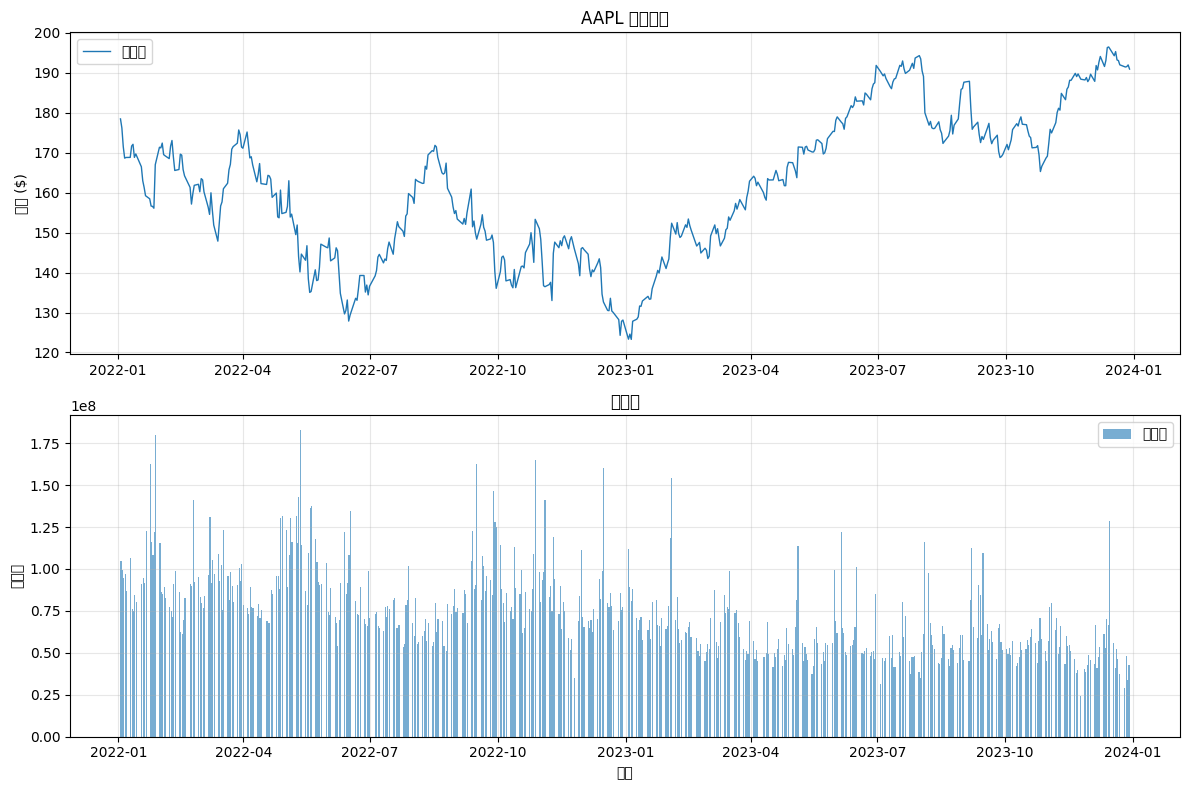

In [7]:
# 绘制价格图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 价格走势
ax1.plot(data.index, data['close'], label='收盘价', linewidth=1)
ax1.set_title(f'{symbol} 股价走势')
ax1.set_ylabel('价格 ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 成交量
ax2.bar(data.index, data['volume'], alpha=0.6, label='成交量')
ax2.set_title('成交量')
ax2.set_xlabel('日期')
ax2.set_ylabel('成交量')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. 移动平均策略

In [5]:
# 创建移动平均策略
ma_strategy = MovingAverageStrategy(short_window=20, long_window=50)

# 生成交易信号
ma_signals = ma_strategy.generate_signals(data)

print("移动平均策略信号统计:")
print(f"买入信号: {(ma_signals['signal'] == 1).sum()}")
print(f"卖出信号: {(ma_signals['signal'] == -1).sum()}")
print(f"持有信号: {(ma_signals['signal'] == 0).sum()}")

ma_signals.head(60)  # 显示前60天的信号

移动平均策略信号统计:
买入信号: 6
卖出信号: 5
持有信号: 490


,signal,position,short_ma,long_ma,ma_spread
Date,,,,,
2022-01-03 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-04 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-05 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-06 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-07 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-10 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-11 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-12 00:00:00-05:00,0,0,NaN,NaN,NaN
2022-01-13 00:00:00-05:00,0,0,NaN,NaN,NaN


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

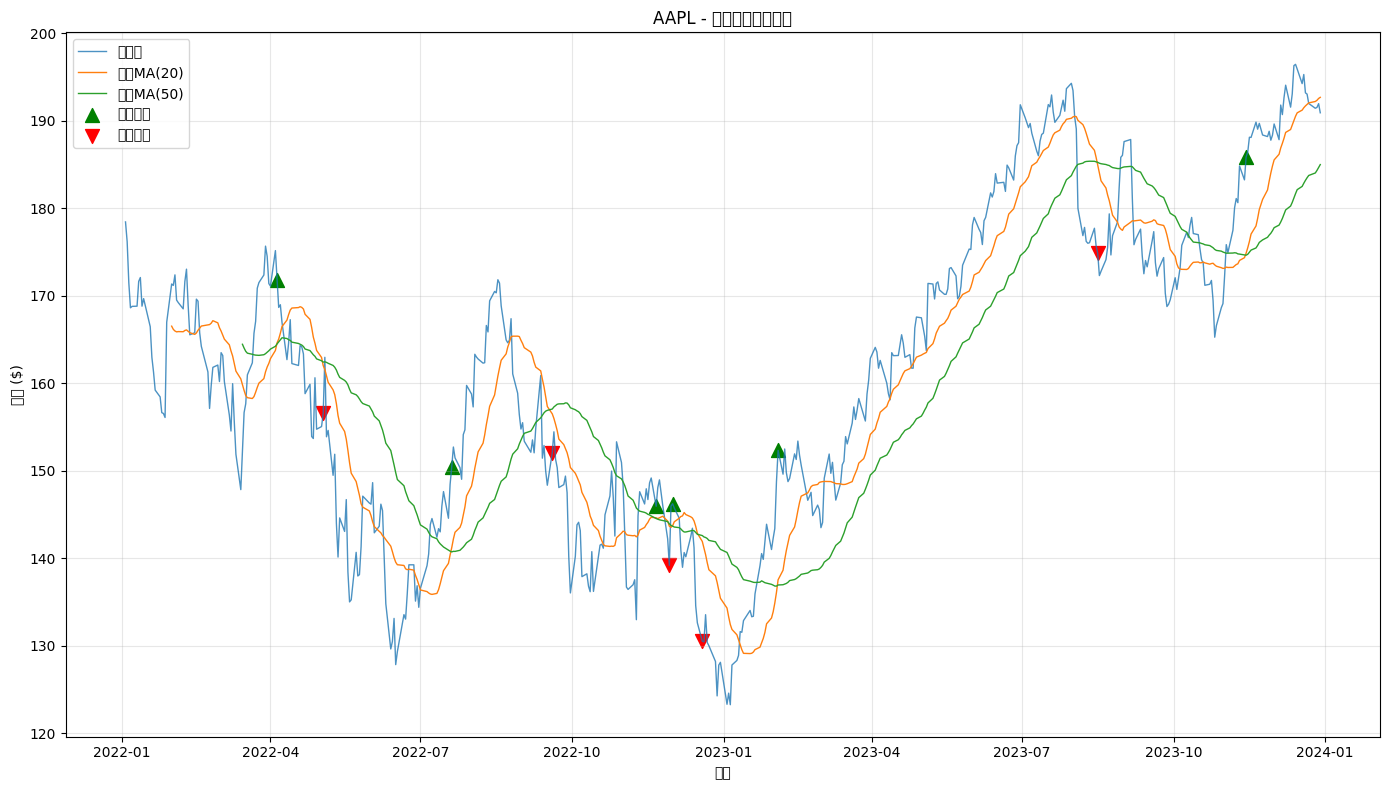

In [6]:
# 可视化移动平均策略
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制价格和移动平均线
ax.plot(data.index, data['close'], label='收盘价', linewidth=1, alpha=0.8)
ax.plot(data.index, ma_signals['short_ma'], label='短期MA(20)', linewidth=1)
ax.plot(data.index, ma_signals['long_ma'], label='长期MA(50)', linewidth=1)

# 标记买入卖出信号
buy_signals = data.index[ma_signals['signal'] == 1]
sell_signals = data.index[ma_signals['signal'] == -1]

if len(buy_signals) > 0:
    ax.scatter(buy_signals, data.loc[buy_signals, 'close'], 
              color='green', marker='^', s=100, label='买入信号')

if len(sell_signals) > 0:
    ax.scatter(sell_signals, data.loc[sell_signals, 'close'], 
              color='red', marker='v', s=100, label='卖出信号')

ax.set_title(f'{symbol} - 移动平均交叉策略')
ax.set_xlabel('日期')
ax.set_ylabel('价格 ($)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. 回测分析

In [7]:
# 运行回测
backtest_engine = BacktestEngine(initial_capital=100000)
ma_results = backtest_engine.run_backtest(ma_strategy, data)

print("="*50)
print("移动平均策略回测结果")
print("="*50)
print(f"总收益率: {ma_results['total_return']:.2%}")
print(f"年化收益率: {ma_results['annual_return']:.2%}")
print(f"年化波动率: {ma_results['volatility']:.2%}")
print(f"夏普比率: {ma_results['sharpe_ratio']:.2f}")
print(f"最大回撤: {ma_results['max_drawdown']:.2%}")
print(f"总交易次数: {ma_results['total_trades']}")
print(f"胜率: {ma_results['win_rate']:.2%}")
print(f"盈亏比: {ma_results['profit_factor']:.2f}")
print(f"最终资金: ${ma_results['final_capital']:,.2f}")

移动平均策略回测结果
总收益率: -0.71%
年化收益率: -0.36%
年化波动率: 1.68%
夏普比率: -0.21
最大回撤: -3.41%
总交易次数: 6
胜率: 50.00%
盈亏比: 0.73
最终资金: $99,286.86


## 5. 均值回归策略

In [ ]:
# 创建均值回归策略
mr_strategy = MeanReversionStrategy()

# 生成交易信号
mr_signals = mr_strategy.generate_signals(data)

print("均值回归策略信号统计:")
print(f"买入信号: {(mr_signals['signal'] == 1).sum()}")
print(f"卖出信号: {(mr_signals['signal'] == -1).sum()}")
print(f"持有信号: {(mr_signals['signal'] == 0).sum()}")

# 运行回测
mr_results = backtest_engine.run_backtest(mr_strategy, data)

print("\n" + "="*50)
print("均值回归策略回测结果")
print("="*50)
print(f"总收益率: {mr_results['total_return']:.2%}")
print(f"年化收益率: {mr_results['annual_return']:.2%}")
print(f"年化波动率: {mr_results['volatility']:.2%}")
print(f"夏普比率: {mr_results['sharpe_ratio']:.2f}")
print(f"最大回撤: {mr_results['max_drawdown']:.2%}")
print(f"总交易次数: {mr_results['total_trades']}")
print(f"胜率: {mr_results['win_rate']:.2%}")
print(f"最终资金: ${mr_results['final_capital']:,.2f}")

## 6. 策略对比

In [ ]:
# 创建策略对比表
comparison_data = {
    '指标': ['总收益率', '年化收益率', '年化波动率', '夏普比率', '最大回撤', '胜率', '总交易次数'],
    '移动平均策略': [
        f"{ma_results['total_return']:.2%}",
        f"{ma_results['annual_return']:.2%}",
        f"{ma_results['volatility']:.2%}",
        f"{ma_results['sharpe_ratio']:.2f}",
        f"{ma_results['max_drawdown']:.2%}",
        f"{ma_results['win_rate']:.2%}",
        ma_results['total_trades']
    ],
    '均值回归策略': [
        f"{mr_results['total_return']:.2%}",
        f"{mr_results['annual_return']:.2%}",
        f"{mr_results['volatility']:.2%}",
        f"{mr_results['sharpe_ratio']:.2f}",
        f"{mr_results['max_drawdown']:.2%}",
        f"{mr_results['win_rate']:.2%}",
        mr_results['total_trades']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("策略性能对比:")
print(comparison_df.to_string(index=False))

## 9. 结论

通过这个示例，我们可以看到：

1. **移动平均策略**：适合趋势市场，能够捕捉长期趋势
2. **均值回归策略**：适合震荡市场，能够在价格偏离均值时获利
3. **策略选择**：应根据市场状况选择合适的策略
4. **风险管理**：需要关注最大回撤和夏普比率等风险指标
5. **参数优化**：通过可视化工具可以直观地分析参数敏感性和性能分布

### 优化可视化的价值:
- **热力图**：帮助识别最佳参数组合区域
- **分布分析**：了解策略性能的统计特征
- **对比分析**：快速比较不同参数组合的表现

### 下一步:
- 尝试不同的参数组合
- 组合多个策略
- 添加风险管理模块
- 在更多股票上测试策略的稳定性
- 使用实际的参数优化结果进行更深入的分析

## 8. 参数优化可视化示例

演示如何使用优化可视化工具来分析策略参数的敏感性。

In [8]:
# 导入优化可视化工具
from optimization.optimization_visualizer import OptimizationVisualizer

# 创建模拟的优化结果数据用于演示
import random
random.seed(42)

# 生成模拟的参数优化结果
optimization_results = []
for bb_period in range(10, 31, 5):  # 布林带周期: 10, 15, 20, 25, 30
    for rsi_period in range(10, 21, 2):  # RSI周期: 10, 12, 14, 16, 18, 20
        # 模拟策略性能指标
        total_return = random.uniform(-0.1, 0.3)  # 总收益率
        sharpe_ratio = random.uniform(-0.5, 2.0)  # 夏普比率
        max_drawdown = random.uniform(-0.2, -0.02)  # 最大回撤
        
        optimization_results.append({
            'params': {
                'bb_period': bb_period,
                'rsi_period': rsi_period,
                'rsi_oversold': 30,
                'rsi_overbought': 70
            },
            'total_return': total_return,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown
        })

# 转换为DataFrame并按夏普比率排序
import pandas as pd
results_df = pd.DataFrame(optimization_results)
results_df = results_df.sort_values('sharpe_ratio', ascending=False)

print(f"生成了 {len(results_df)} 个参数组合的模拟结果")
print("\n前5名最佳参数组合:")
for i, row in results_df.head().iterrows():
    params = row['params']
    print(f"#{i+1}: BB={params['bb_period']}, RSI={params['rsi_period']}, "
          f"夏普比率={row['sharpe_ratio']:.3f}, 总收益={row['total_return']:.2%}")

# 创建可视化工具实例
visualizer = OptimizationVisualizer()

生成了 30 个参数组合的模拟结果

前5名最佳参数组合:
#26: BB=30, RSI=12, 夏普比率=1.786, 总收益=5.83%
#10: BB=15, RSI=16, 夏普比率=1.619, 总收益=-6.13%
#22: BB=25, RSI=16, 夏普比率=1.607, 总收益=17.38%
#2: BB=10, RSI=12, 夏普比率=1.341, 总收益=-1.07%
#11: BB=15, RSI=18, 夏普比率=1.324, 总收益=22.29%


1. 参数优化热力图


c:\Users\Bing\miniconda3\envs\quanttrading\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Bing\miniconda3\envs\quanttrading\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Bing\miniconda3\envs\quanttrading\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\Bing\miniconda3\envs\quanttrading\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  fig.canvas.draw()
D:\Work\quant_trading\optimization\optimization_visualizer.py:74: UserWarning: Glyph 21442 (\N{CJK UNIFIED IDEOGRAPH-53C2}) missing from font(s) Arial.
  plt.tight_layout()
D:\Work\quant_trading\optimization\optimization_visualizer.py:74: UserWarni

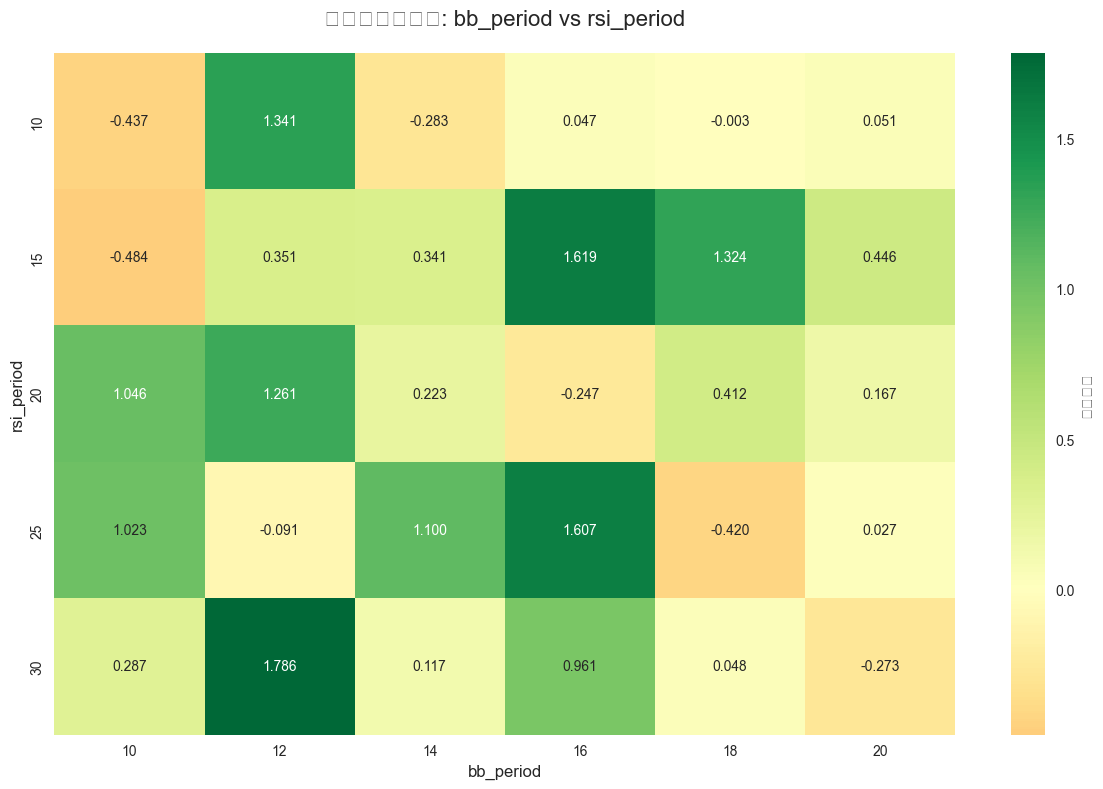

In [9]:
# 1. 绘制参数优化热力图
print("1. 参数优化热力图")
heatmap_fig = visualizer.plot_optimization_heatmap(results_df, 'bb_period', 'rsi_period')
if heatmap_fig:
    plt.show()
else:
    print("热力图生成失败")

2. 夏普比率分布分析


D:\Work\quant_trading\optimization\optimization_visualizer.py:171: UserWarning: Glyph 22799 (\N{CJK UNIFIED IDEOGRAPH-590F}) missing from font(s) Arial.
  plt.tight_layout()
D:\Work\quant_trading\optimization\optimization_visualizer.py:171: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from font(s) Arial.
  plt.tight_layout()
D:\Work\quant_trading\optimization\optimization_visualizer.py:171: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) Arial.
  plt.tight_layout()
D:\Work\quant_trading\optimization\optimization_visualizer.py:171: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
D:\Work\quant_trading\optimization\optimization_visualizer.py:171: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  plt.tight_layout()
D:\Work\quant_trading\optimization\optimization_visualizer.py:171: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missi

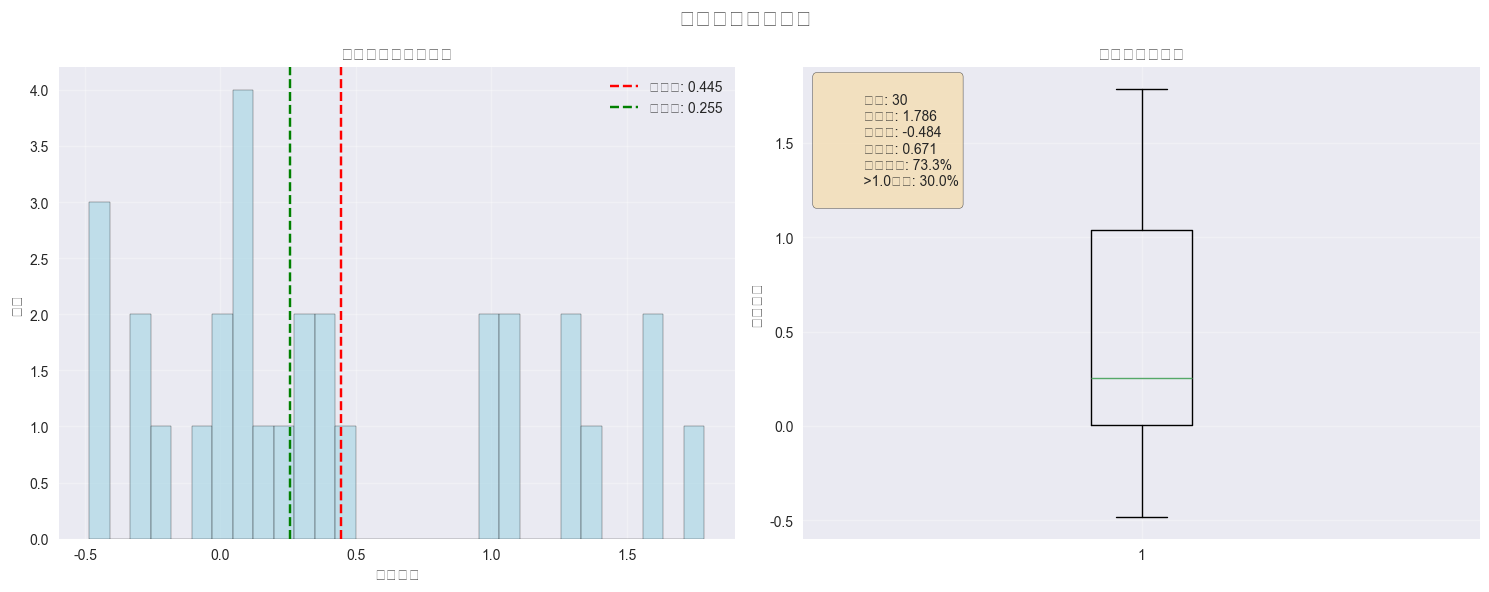

In [10]:
# 2. 绘制夏普比率分布分析
print("2. 夏普比率分布分析")
distribution_fig = visualizer.plot_sharpe_distribution(results_df)
if distribution_fig:
    plt.show()
else:
    print("分布图生成失败")

In [ ]:
# 3. 绘制前10名参数组合对比
print("3. 前10名参数组合对比")
top_combinations_fig = visualizer.plot_top_combinations(results_df, top_n=10)
if top_combinations_fig:
    plt.show()
else:
    print("前10名组合图生成失败")